In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer


In [30]:
df = pd.read_csv('insurance.csv' ,usecols=['age','bmi','charges','smoker'])

In [32]:
df.head()

,age,bmi,smoker,charges
0,19,27.900,yes,16884.92400
1,18,33.770,no,1725.55230
2,28,33.000,no,4449.46200
3,33,22.705,no,21984.47061
4,32,28.880,no,3866.85520


In [34]:
df.isna().sum()

age        0
bmi        0
smoker     0
charges    0
dtype: int64

In [36]:
df.describe()

,age,bmi,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,13270.422265
std,14.049960,6.098187,12110.011237
min,18.000000,15.960000,1121.873900
25%,27.000000,26.296250,4740.287150
50%,39.000000,30.400000,9382.033000
75%,51.000000,34.693750,16639.912515
max,64.000000,53.130000,63770.428010


In [38]:
x = df.drop(columns=['smoker'])
y = df['smoker']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [86]:
X_train.sample(5)

,age,bmi,charges
348,36,29.920,5478.03680
1207,36,33.400,38415.47400
1016,19,24.605,2709.24395
1318,35,39.710,19496.71917
784,31,29.260,4350.51440


In [44]:
clf= DecisionTreeClassifier()

In [48]:
clf.fit(X_train, y_train)
y_prd = clf.predict(X_test)
accuracy_score(y_test, y_prd)

0.9701492537313433

In [60]:
np.mean(cross_val_score(DecisionTreeClassifier(), x, y, cv=10, scoring='accuracy'))

0.9648580406239479

In [88]:
kbin_age= KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
kbin_bmi= KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
kbin_charges= KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

In [90]:
trf = ColumnTransformer([
    ('age', kbin_age, [0]),
    ('bmi', kbin_bmi, [1]),
    ('charges', kbin_charges, [2])
])

In [94]:
X_train_trf = trf.fit_transform(X_train, y_train)
X_test_trf = trf.transform(X_test)

In [100]:
trf.named_transformers_['age'].bin_edges_

array([array([18. , 19. , 24. , 29. , 34. , 39.5, 45. , 49. , 54. , 59. , 64. ])],
      dtype=object)

In [102]:
columns = pd.DataFrame({
    'age': X_train['age'],
    'age_trf': X_train_trf[:, 0],
    'bmi': X_train['bmi'],
    'bmi_trf' : X_train_trf[:, 1],
    'charges' : X_train['charges'],
    'charges_trf': X_train_trf[: , 2]
})

In [106]:
columns['age_label'] = pd.cut(x= X_train['age'], bins = trf.named_transformers_['age'].bin_edges_[0].tolist())
columns['bmi_label'] = pd.cut(x= X_train['bmi'], bins = trf.named_transformers_['bmi'].bin_edges_[0].tolist())
columns['charges_label'] = pd.cut(x = X_train['charges'], bins = trf.named_transformers_['charges'].bin_edges_[0].tolist())

In [110]:
columns.head()

,age,age_trf,bmi,bmi_trf,charges,charges_trf,age_label,bmi_label,charges_label
560,46,6.0,19.95,0.0,9193.83850,4.0,"(45.0, 49.0]","(15.96, 22.895]","(7631.03, 9575.442]"
1285,47,6.0,24.32,1.0,8534.67180,4.0,"(45.0, 49.0]","(22.895, 25.195]","(7631.03, 9575.442]"
1142,52,7.0,24.86,1.0,27117.99378,8.0,"(49.0, 54.0]","(22.895, 25.195]","(20152.926, 34829.676]"
969,39,4.0,34.32,7.0,8596.82780,4.0,"(34.0, 39.5]","(33.63, 35.815]","(7631.03, 9575.442]"
486,54,8.0,21.47,0.0,12475.35130,6.0,"(49.0, 54.0]","(15.96, 22.895]","(11497.952, 13897.525]"


In [112]:
clf = DecisionTreeClassifier()

In [114]:
clf.fit(X_train_trf, y_train)
y_prd1 = clf.predict(X_test_trf)
accuracy_score(y_test,y_prd1)

0.9589552238805971

In [126]:
X_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(), X_trf, y ,cv=10, scoring='accuracy'))

0.9491751767478396

In [128]:
def discretize(bins , strategy):
    kbin_age= KBinsDiscretizer(n_bins=bins , strategy=strategy, encode='ordinal')
    kbin_bmi= KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)
    kbin_charges= KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy=strategy)

    trf=ColumnTransformer([
        ('age',kbin_age,[0]),
        ('bmi',kbin_bmi,[1]),
        ('charges',kbin_charges,[2])
    ])
    X_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(), X_trf, y, cv=10, scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['age'])
    plt.title('Before')
    plt.subplot(122)
    plt.hist(X_trf[:,0],color='r')
    plt.title('After')
    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['bmi'])
    plt.title('Before')
    plt.subplot(122)
    plt.hist(X_trf[:,1],color='r')
    plt.title('After')
    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['charges'])
    plt.title('Before')
    plt.subplot(122)
    plt.hist(X_trf[:,2],color='r')
    plt.title('After')
    plt.show()

0.9670968465940971


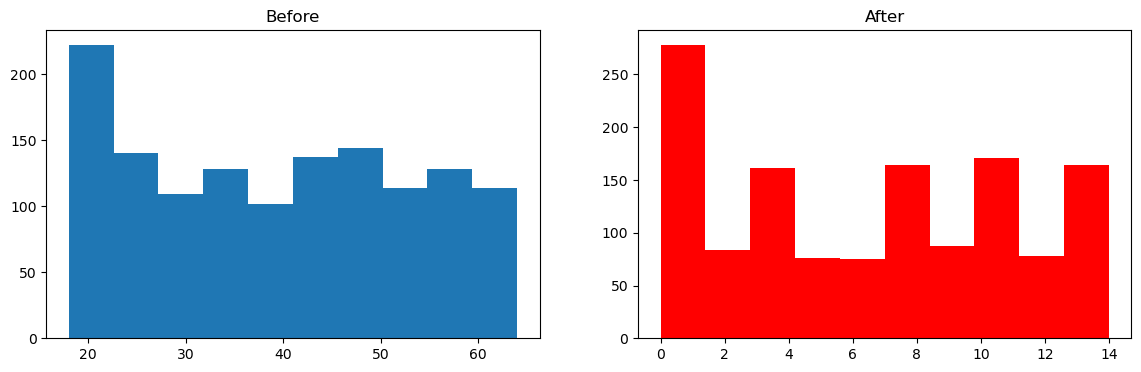

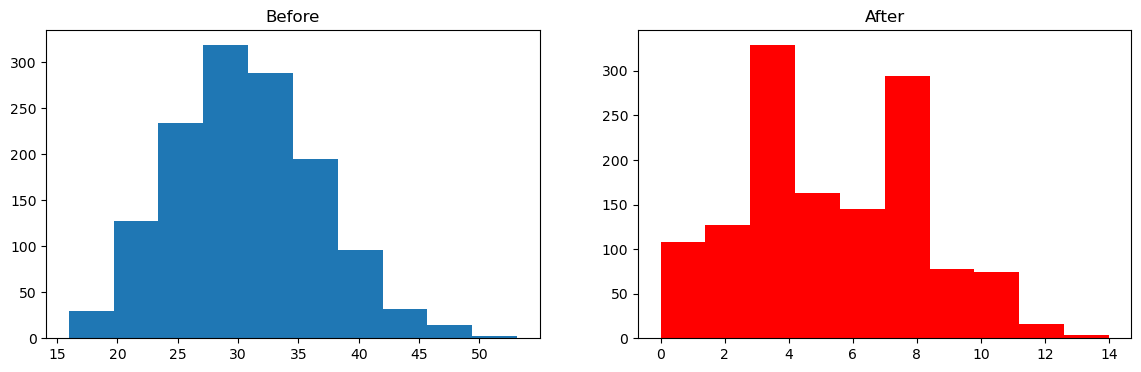

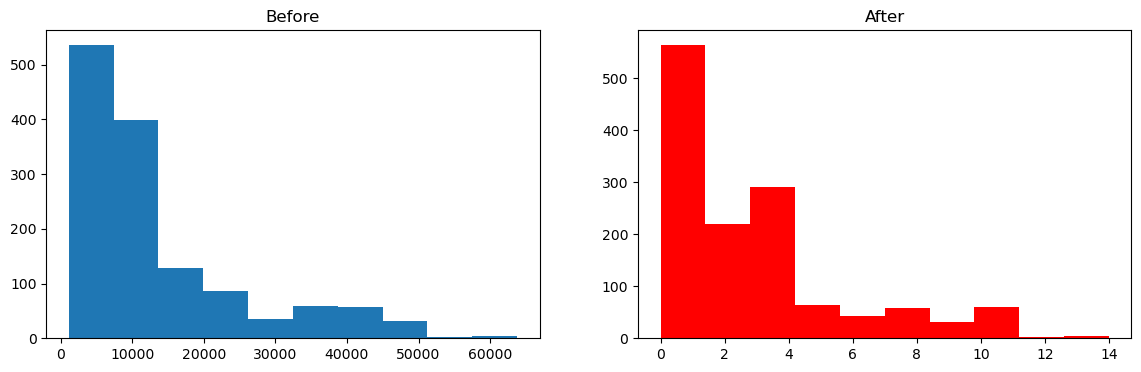

In [146]:
discretize(15, 'kmeans')